In [30]:
from __future__ import annotations

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
import uproot
# from HH4b import plotting, utils


In [31]:
import hist
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mplhep as hep

hep.style.use(["CMS", "firamath"])

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"



In [32]:
filepath = '/home/amy/khoan/particle_transformer/models/predict_output/'
filename = 'pred_HToBB.root'
path = filepath+filename
print(path)
tree = uproot.open(path)['Events']
tree.show()
table = tree.arrays()




/home/amy/khoan/particle_transformer/models/predict_output/pred_HToBB.root
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
label_QCD            | bool                     | AsDtype('bool')
score_label_QCD      | float                    | AsDtype('>f4')
label_Hbb            | bool                     | AsDtype('bool')
score_label_Hbb      | float                    | AsDtype('>f4')
label_Hcc            | bool                     | AsDtype('bool')
score_label_Hcc      | float                    | AsDtype('>f4')
label_Hgg            | bool                     | AsDtype('bool')
score_label_Hgg      | float                    | AsDtype('>f4')
label_H4q            | bool                     | AsDtype('bool')
score_label_H4q      | float                    | AsDtype('>f4')
label_Hqql           | bool                     | AsDtype('bool')
score_label_Hqql     | float              

In [33]:
filepath = '/home/amy/khoan/particle_transformer/models/predict_output/'
files = ['HToBB', 'HToCC', 'HToGG', 'HToWW2Q1L', 'HToWW4Q', 'TTBar', 'TTBarLep', 'WToQQ', 'ZJetsToNuNu', 'ZToQQ']
names = ['QCD', 'Hbb', 'Hcc', 'Hgg', 'H4q', 'Hqql', 'Zqq', 'Wqq', 'Tbqq', 'Tbl']



QCD
[False False False ... False False False] HToBB
[False False False ... False False False] HToCC
[False False False ... False False False] HToGG
[False False False ... False False False] HToWW2Q1L
[False False False ... False False False] HToWW4Q
[False False False ... False False False] TTBar
[False False False ... False False False] TTBarLep
[False False False ... False False False] WToQQ
[ True  True  True ...  True  True  True] ZJetsToNuNu
[False False False ... False False False] ZToQQ
Hbb
[ True  True  True ...  True  True  True] HToBB
[False False False ... False False False] HToCC
[False False False ... False False False] HToGG
[False False False ... False False False] HToWW2Q1L
[False False False ... False False False] HToWW4Q
[False False False ... False False False] TTBar
[False False False ... False False False] TTBarLep
[False False False ... False False False] WToQQ
[False False False ... False False False] ZJetsToNuNu
[False False False ... False False False] ZToQQ
Hc

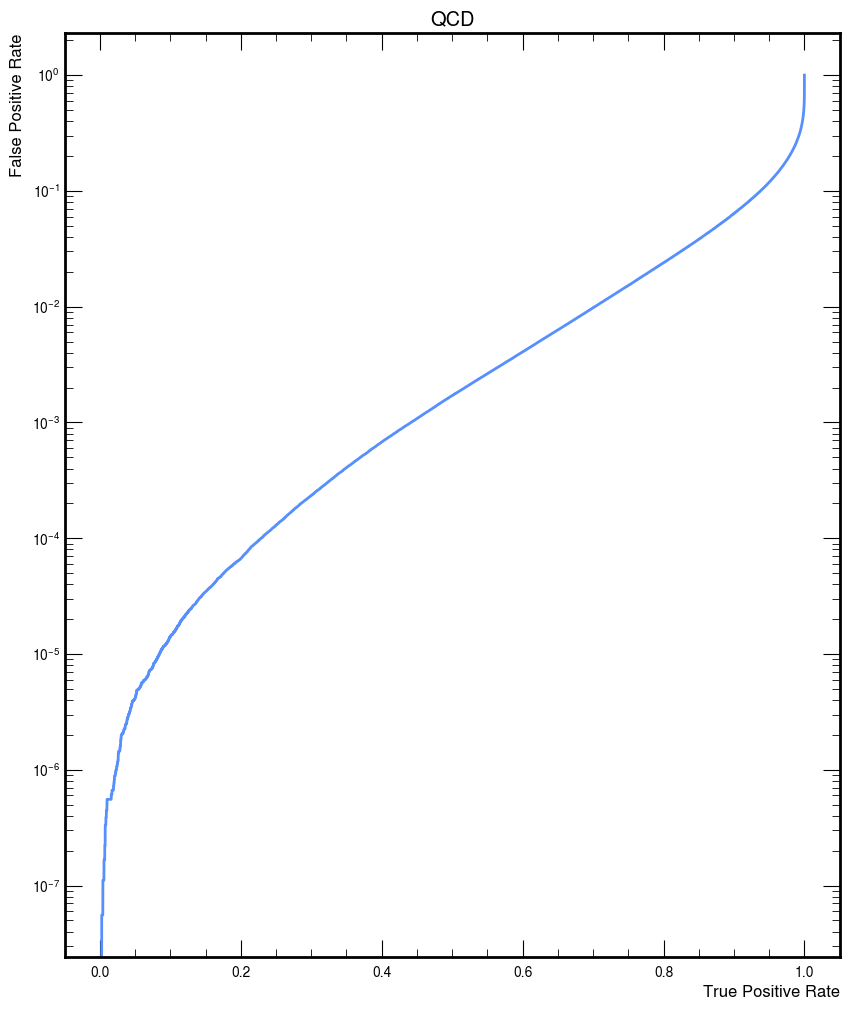

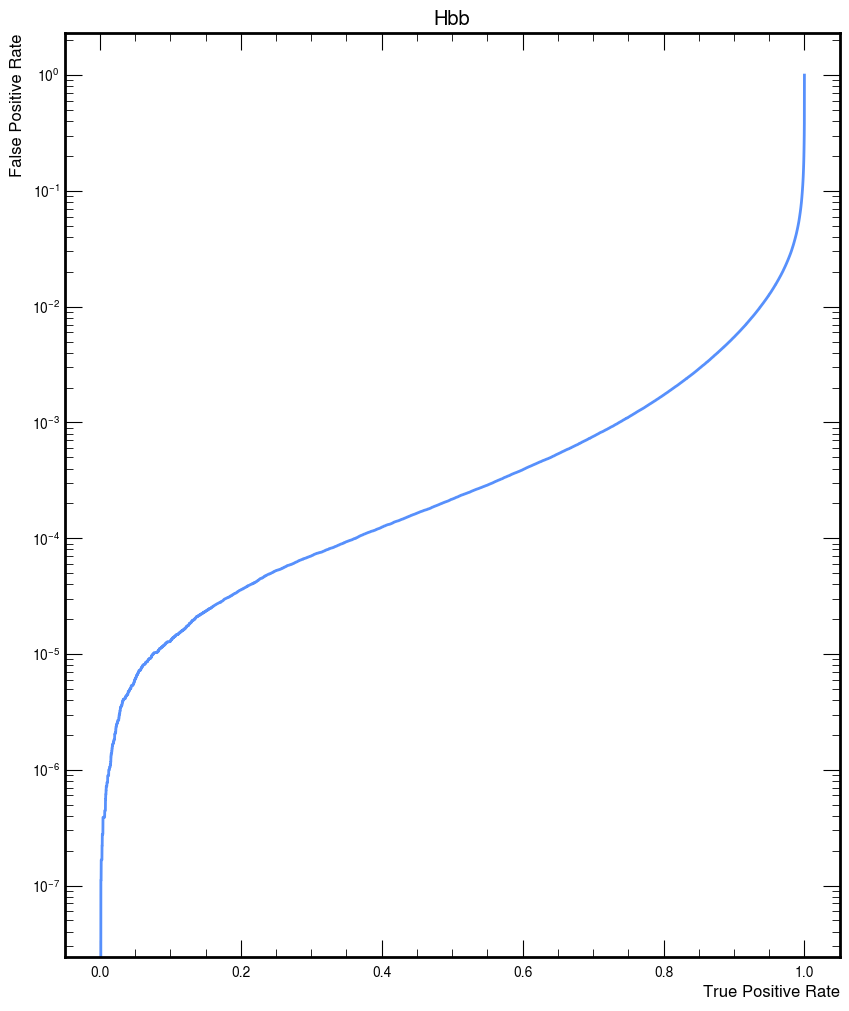

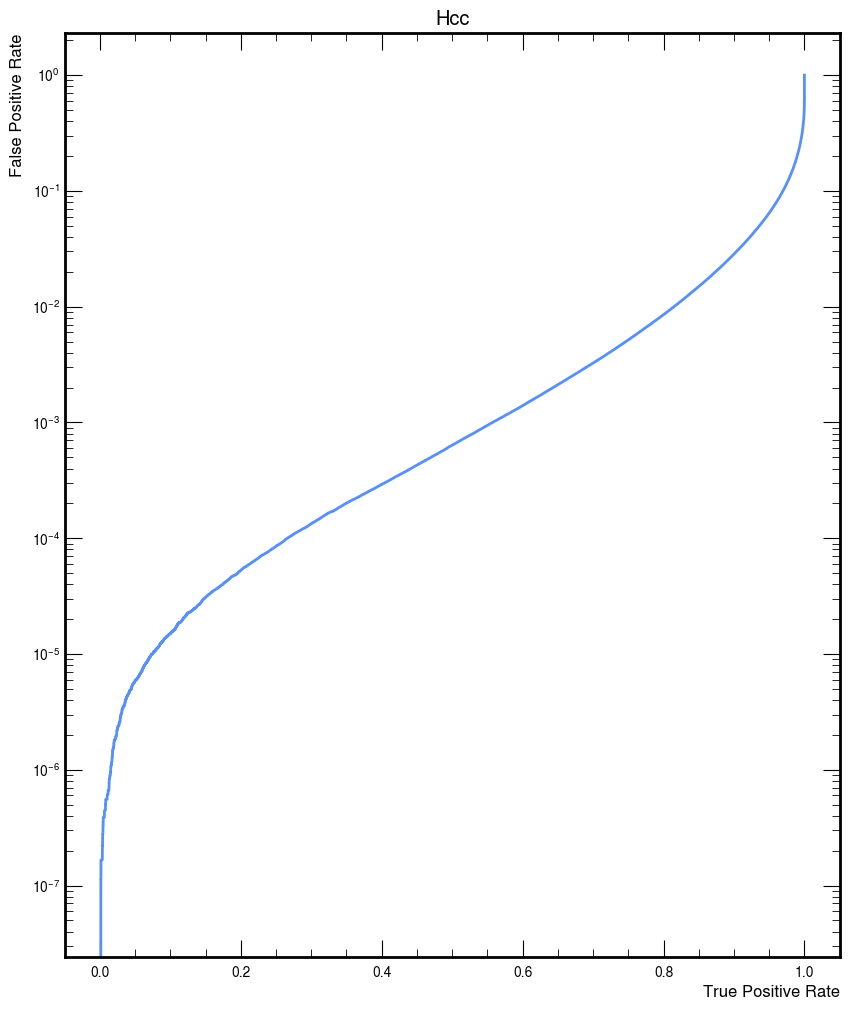

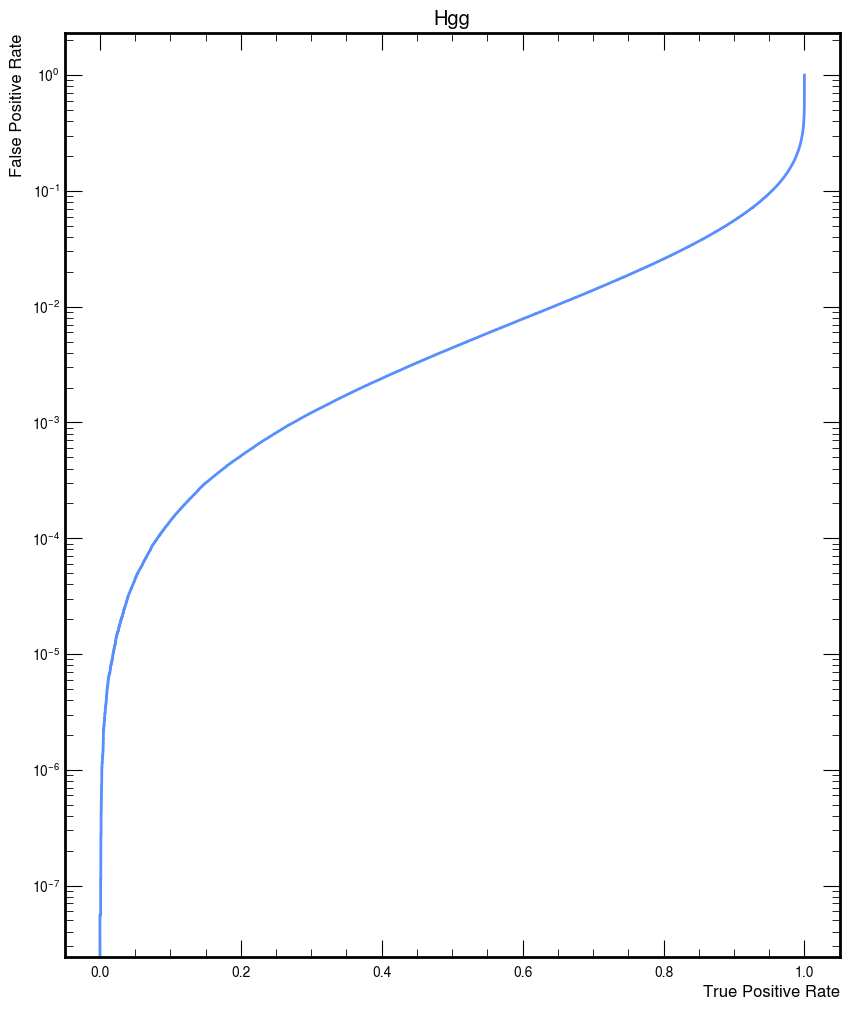

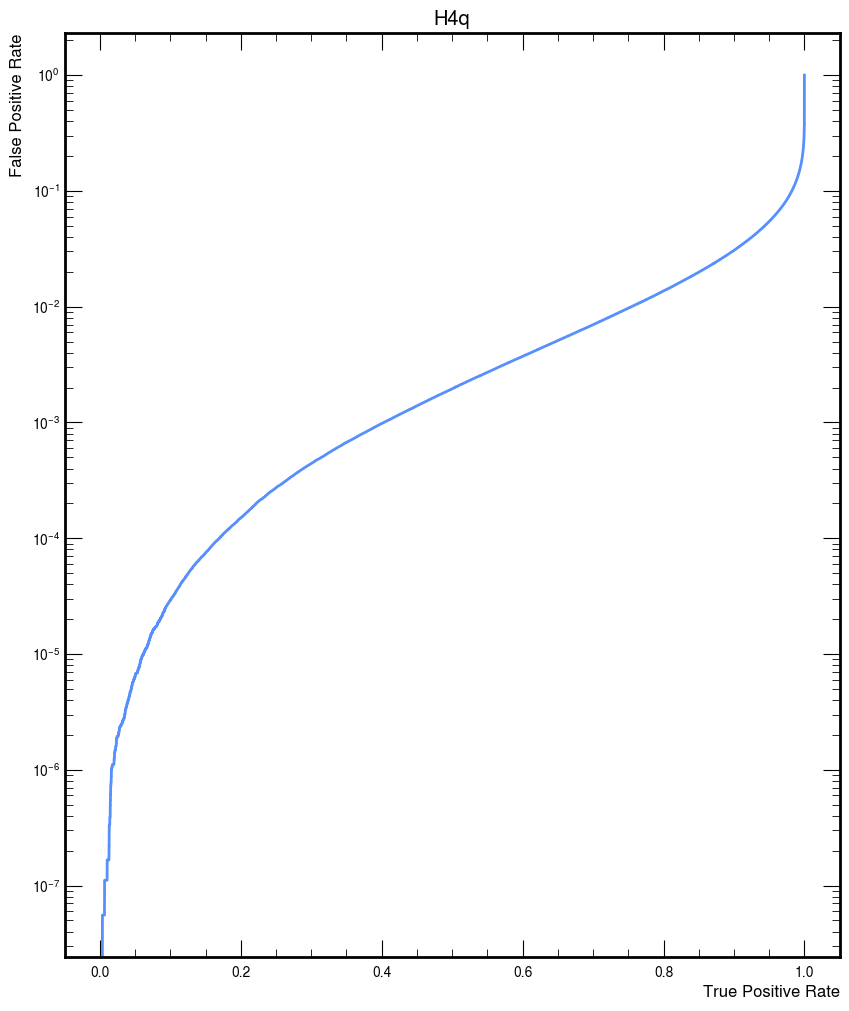

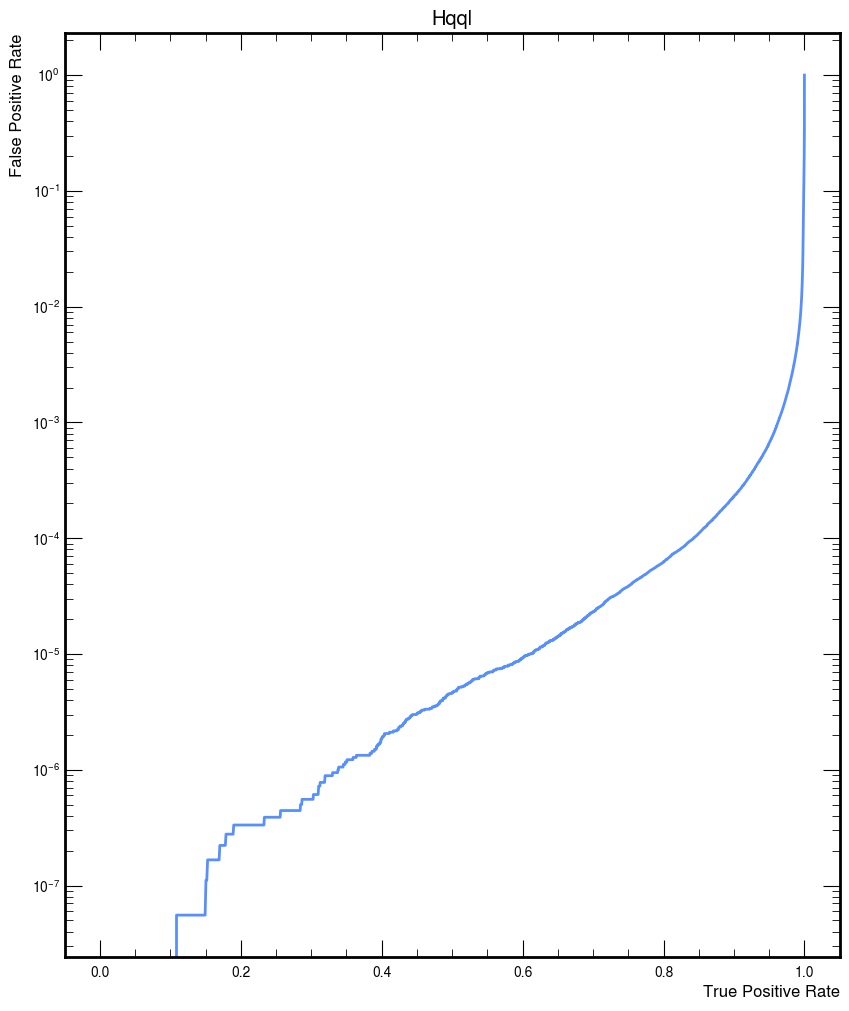

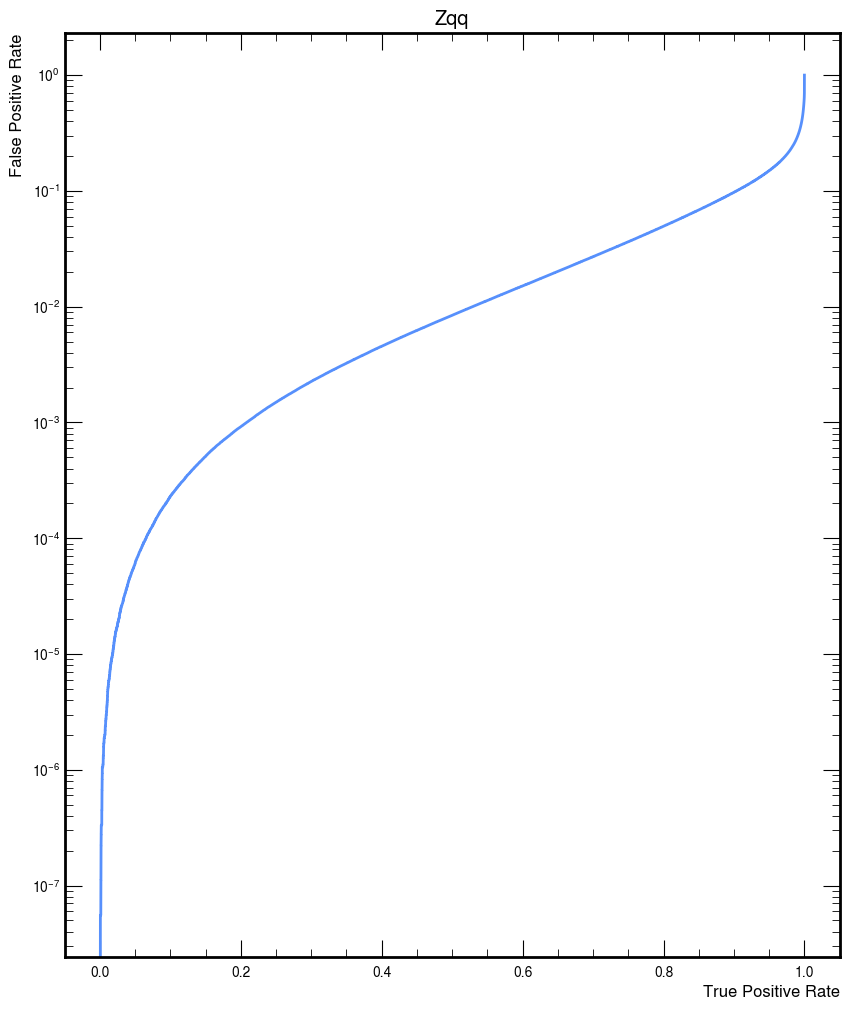

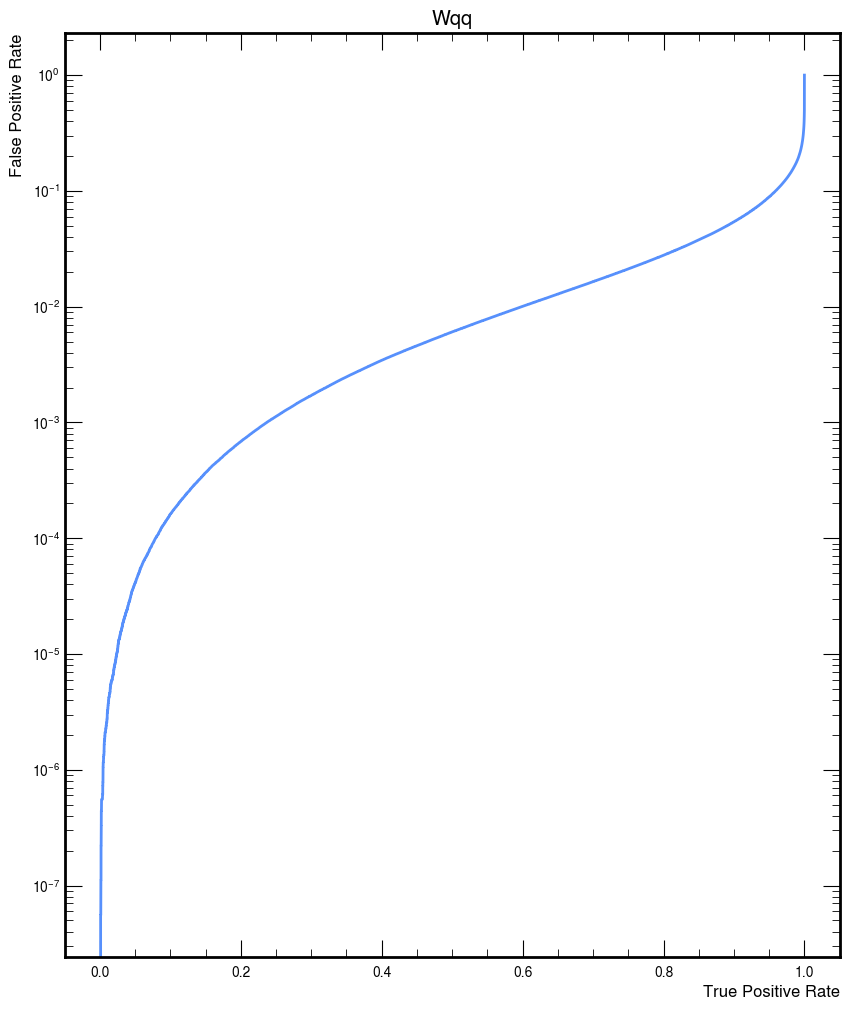

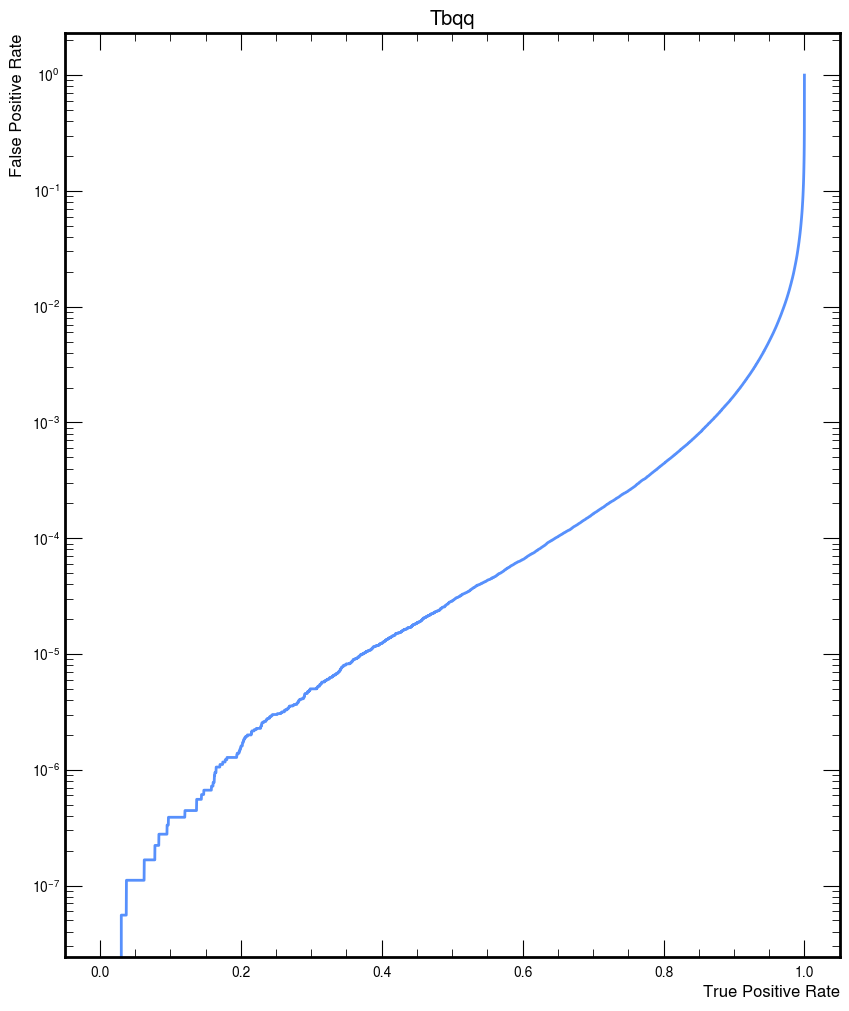

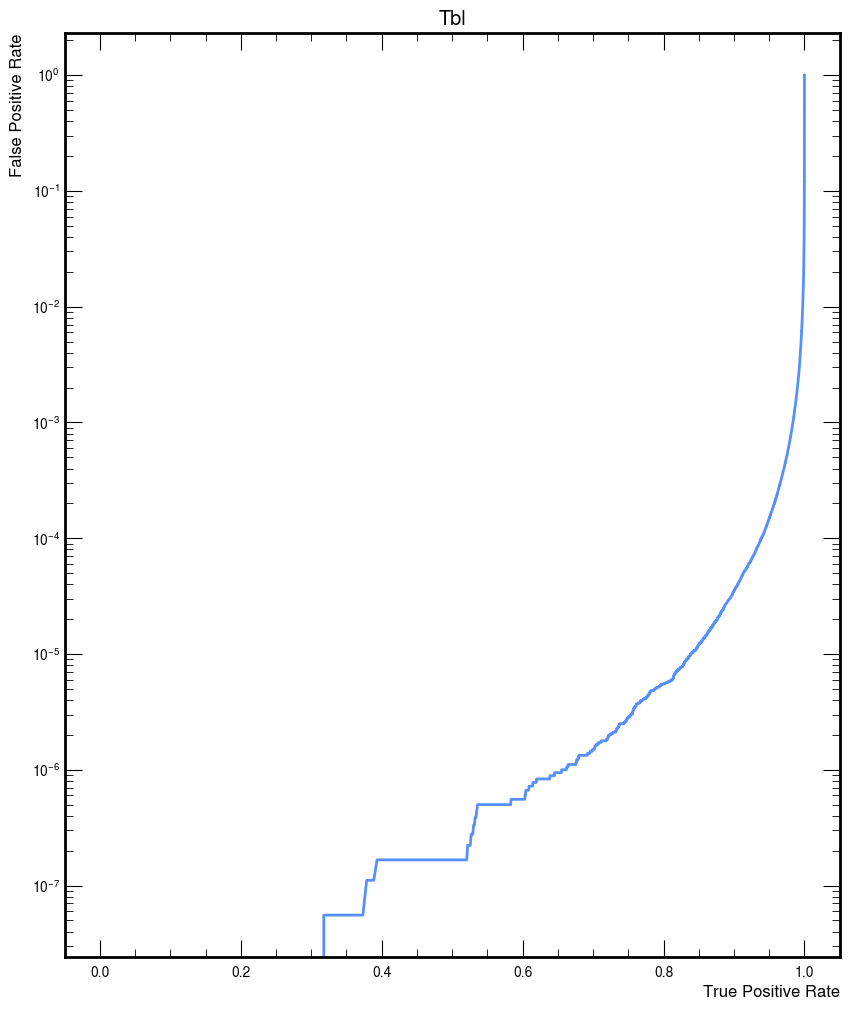

In [40]:

for n in names:
    print(n)
    combine_label = []
    combine_score = []
    for i in files:
        filename = 'pred_' + i + '.root'
        path = filepath+filename
        tree = uproot.open(path)['Events']
        table = tree.arrays()
        label_i = table['label_' + n].to_numpy() 
        score_i = table['score_label_'+ n].to_numpy()
        print(label_i, i)
        combine_label = np.concatenate((combine_label,label_i))
        combine_score = np.concatenate((combine_score, score_i))

    

    fpr,tpr,thresh = roc_curve(y_true = combine_label, y_score= combine_score)

    fig, ax = plt.subplots(figsize=(10,12))
    ax.plot(tpr,fpr)
    ax.set_yscale("log")
    ax.set_ylabel("False Positive Rate")
    ax.set_xlabel("True Positive Rate")
    ax.set_title(n)
    plt.savefig('roc_curves/' + n +'.png')
